# 10 Minutes to pandas
Author: Siraj Shabbir  
Date: 23/09/2023  
Email: sirajshabbir321@gmail.com

In [249]:
import pandas as pd
import numpy as np

### Object Creation

>**Series:** a one-dimensional labeled array holding data of any type such as integers, strings, Python objects etc.

>**DataFrame:** a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

In [250]:
# Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [251]:
# date range
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [252]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.457339,-0.138472,-1.246061,0.443880
2013-01-02,0.058918,0.555656,-1.015052,-0.479722
2013-01-03,-1.663889,0.571987,-0.341669,-2.523616
2013-01-04,0.584602,-0.308483,0.112441,0.488629
2013-01-05,-0.439840,0.778949,0.292099,-1.448489
2013-01-06,-0.057219,-1.140062,-0.224867,0.610259


In [253]:
# DataFrame
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20230923"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2

,A,B,C,D,E,F
0,1.0,2023-09-23,1.0,3,test,foo
1,1.0,2023-09-23,1.0,3,train,foo
2,1.0,2023-09-23,1.0,3,test,foo
3,1.0,2023-09-23,1.0,3,train,foo


In [254]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Viewing data

In [255]:
# first 5 rows
df.head()

,A,B,C,D
2013-01-01,-0.457339,-0.138472,-1.246061,0.443880
2013-01-02,0.058918,0.555656,-1.015052,-0.479722
2013-01-03,-1.663889,0.571987,-0.341669,-2.523616
2013-01-04,0.584602,-0.308483,0.112441,0.488629
2013-01-05,-0.439840,0.778949,0.292099,-1.448489


In [256]:
# last 3 rows
df.tail(3)

,A,B,C,D
2013-01-04,0.584602,-0.308483,0.112441,0.488629
2013-01-05,-0.439840,0.778949,0.292099,-1.448489
2013-01-06,-0.057219,-1.140062,-0.224867,0.610259


In [257]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [258]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [259]:
# NumPy array
df.to_numpy()

array([[-0.45733871, -0.13847214, -1.24606123,  0.44387954],
       [ 0.05891763,  0.55565616, -1.01505207, -0.47972152],
       [-1.66388935,  0.57198739, -0.34166851, -2.52361574],
       [ 0.58460226, -0.30848275,  0.11244113,  0.48862883],
       [-0.43983969,  0.77894905,  0.29209871, -1.4484885 ],
       [-0.05721933, -1.14006205, -0.22486699,  0.61025888]])

In [260]:
df2.to_numpy()

array([[1.0, Timestamp('2023-09-23 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2023-09-23 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2023-09-23 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2023-09-23 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [261]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.329128,0.053263,-0.403851,-0.484843
std,0.757588,0.726600,0.611505,1.272372
min,-1.663889,-1.140062,-1.246061,-2.523616
25%,-0.452964,-0.265980,-0.846706,-1.206297
50%,-0.248530,0.208592,-0.283268,-0.017921
75%,0.029883,0.567905,0.028114,0.477442
max,0.584602,0.778949,0.292099,0.610259


In [262]:
# Transpose
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.457339,0.058918,-1.663889,0.584602,-0.439840,-0.057219
B,-0.138472,0.555656,0.571987,-0.308483,0.778949,-1.140062
C,-1.246061,-1.015052,-0.341669,0.112441,0.292099,-0.224867
D,0.443880,-0.479722,-2.523616,0.488629,-1.448489,0.610259


In [263]:
# sorting columns
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.443880,-1.246061,-0.138472,-0.457339
2013-01-02,-0.479722,-1.015052,0.555656,0.058918
2013-01-03,-2.523616,-0.341669,0.571987,-1.663889
2013-01-04,0.488629,0.112441,-0.308483,0.584602
2013-01-05,-1.448489,0.292099,0.778949,-0.439840
2013-01-06,0.610259,-0.224867,-1.140062,-0.057219


In [264]:
# sorting df by column B
df.sort_values(by="B")

,A,B,C,D
2013-01-06,-0.057219,-1.140062,-0.224867,0.610259
2013-01-04,0.584602,-0.308483,0.112441,0.488629
2013-01-01,-0.457339,-0.138472,-1.246061,0.443880
2013-01-02,0.058918,0.555656,-1.015052,-0.479722
2013-01-03,-1.663889,0.571987,-0.341669,-2.523616
2013-01-05,-0.439840,0.778949,0.292099,-1.448489


### Selection

In [265]:
# by []
df["A"]

2013-01-01   -0.457339
2013-01-02    0.058918
2013-01-03   -1.663889
2013-01-04    0.584602
2013-01-05   -0.439840
2013-01-06   -0.057219
Freq: D, Name: A, dtype: float64

In [266]:
# by []
df[0:3]

,A,B,C,D
2013-01-01,-0.457339,-0.138472,-1.246061,0.443880
2013-01-02,0.058918,0.555656,-1.015052,-0.479722
2013-01-03,-1.663889,0.571987,-0.341669,-2.523616


In [267]:
# by []
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.058918,0.555656,-1.015052,-0.479722
2013-01-03,-1.663889,0.571987,-0.341669,-2.523616
2013-01-04,0.584602,-0.308483,0.112441,0.488629


In [268]:
# by label
df.loc[dates[0]]

A   -0.457339
B   -0.138472
C   -1.246061
D    0.443880
Name: 2013-01-01 00:00:00, dtype: float64

In [269]:
# all rows, columns A and B
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.457339,-0.138472
2013-01-02,0.058918,0.555656
2013-01-03,-1.663889,0.571987
2013-01-04,0.584602,-0.308483
2013-01-05,-0.439840,0.778949
2013-01-06,-0.057219,-1.140062


In [270]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,0.058918,0.555656
2013-01-03,-1.663889,0.571987
2013-01-04,0.584602,-0.308483


In [271]:
# scalar value
%timeit df.loc[dates[0], "A"]

27.1 µs ± 2.85 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [272]:
# fast access to scalar
%timeit df.at[dates[0], "A"]

20 µs ± 2.8 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [273]:
# select via position
df.iloc[3]

A    0.584602
B   -0.308483
C    0.112441
D    0.488629
Name: 2013-01-04 00:00:00, dtype: float64

In [274]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.584602,-0.308483
2013-01-05,-0.439840,0.778949


In [275]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.058918,-1.015052
2013-01-03,-1.663889,-0.341669
2013-01-05,-0.439840,0.292099


In [276]:
# scalar value
%timeit df.iloc[1, 1]

27.2 µs ± 2.51 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [277]:
# fast access to scalar
%timeit df.iat[1, 1]

19.4 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Boolean indexing

In [278]:
df[df["A"] > 0]

,A,B,C,D
2013-01-02,0.058918,0.555656,-1.015052,-0.479722
2013-01-04,0.584602,-0.308483,0.112441,0.488629


In [279]:
# selecting all positive values
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,0.443880
2013-01-02,0.058918,0.555656,NaN,NaN
2013-01-03,NaN,0.571987,NaN,NaN
2013-01-04,0.584602,NaN,0.112441,0.488629
2013-01-05,NaN,0.778949,0.292099,NaN
2013-01-06,NaN,NaN,NaN,0.610259


In [280]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.457339,-0.138472,-1.246061,0.443880,one
2013-01-02,0.058918,0.555656,-1.015052,-0.479722,one
2013-01-03,-1.663889,0.571987,-0.341669,-2.523616,two
2013-01-04,0.584602,-0.308483,0.112441,0.488629,three
2013-01-05,-0.439840,0.778949,0.292099,-1.448489,four
2013-01-06,-0.057219,-1.140062,-0.224867,0.610259,three


In [281]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-1.663889,0.571987,-0.341669,-2.523616,two
2013-01-05,-0.439840,0.778949,0.292099,-1.448489,four


### Setting

In [282]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [283]:
# automatically aligns the data by the indexes
df["F"] = s1
df

,A,B,C,D,F
2013-01-01,-0.457339,-0.138472,-1.246061,0.443880,NaN
2013-01-02,0.058918,0.555656,-1.015052,-0.479722,1.0
2013-01-03,-1.663889,0.571987,-0.341669,-2.523616,2.0
2013-01-04,0.584602,-0.308483,0.112441,0.488629,3.0
2013-01-05,-0.439840,0.778949,0.292099,-1.448489,4.0
2013-01-06,-0.057219,-1.140062,-0.224867,0.610259,5.0


In [284]:
# by label
df.at[dates[0], "A"] = 0
# by position
df.iat[0, 1] = 0
# assgning whole column
df.loc[:, "D"] = np.array([5] * len(df))

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.246061,5.0,NaN
2013-01-02,0.058918,0.555656,-1.015052,5.0,1.0
2013-01-03,-1.663889,0.571987,-0.341669,5.0,2.0
2013-01-04,0.584602,-0.308483,0.112441,5.0,3.0
2013-01-05,-0.439840,0.778949,0.292099,5.0,4.0
2013-01-06,-0.057219,-1.140062,-0.224867,5.0,5.0


In [285]:
df2 = df.copy()
# where operation with setting
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.246061,-5.0,NaN
2013-01-02,-0.058918,-0.555656,-1.015052,-5.0,-1.0
2013-01-03,-1.663889,-0.571987,-0.341669,-5.0,-2.0
2013-01-04,-0.584602,-0.308483,-0.112441,-5.0,-3.0
2013-01-05,-0.439840,-0.778949,-0.292099,-5.0,-4.0
2013-01-06,-0.057219,-1.140062,-0.224867,-5.0,-5.0


### Missing data

In [286]:
# reindexing
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.246061,5.0,NaN,1.0
2013-01-02,0.058918,0.555656,-1.015052,5.0,1.0,1.0
2013-01-03,-1.663889,0.571987,-0.341669,5.0,2.0,NaN
2013-01-04,0.584602,-0.308483,0.112441,5.0,3.0,NaN


In [287]:
# drop any rows that have missing data
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,0.058918,0.555656,-1.015052,5.0,1.0,1.0


In [288]:
# fill missing data
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.246061,5.0,5.0,1.0
2013-01-02,0.058918,0.555656,-1.015052,5.0,1.0,1.0
2013-01-03,-1.663889,0.571987,-0.341669,5.0,2.0,5.0
2013-01-04,0.584602,-0.308483,0.112441,5.0,3.0,5.0


In [289]:
pd.isna(df1)
# same as
# df1.isna()

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### Operations

In [290]:
# mean of columns
df.mean()

A   -0.252905
B    0.076341
C   -0.403851
D    5.000000
F    3.000000
dtype: float64

In [291]:
# mean of rows
df.mean(1)

2013-01-01    0.938485
2013-01-02    1.119904
2013-01-03    1.113286
2013-01-04    1.677712
2013-01-05    1.926242
2013-01-06    1.715570
Freq: D, dtype: float64

In [292]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [293]:
# Get Subtraction of dataframe and other, element-wise (binary operator sub).
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.663889,-0.428013,-1.341669,4.0,1.0
2013-01-04,-2.415398,-3.308483,-2.887559,2.0,0.0
2013-01-05,-5.439840,-4.221051,-4.707901,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [294]:
# user defined functions
df.agg(lambda x: np.mean(x) * 5.6)

A    -1.416267
B     0.427511
C    -2.261568
D    28.000000
F    16.800000
dtype: float64

### Value Counts

In [295]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    5
2    3
3    2
4    3
5    4
6    2
7    1
8    3
9    2
dtype: int32

In [296]:
s.value_counts()

3    3
2    3
5    2
4    1
1    1
Name: count, dtype: int64

### String Methods

In [297]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [298]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [299]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.492327,0.471419,1.550250,2.333321
1,-0.167315,-1.611967,1.791454,-0.155162
2,-0.925008,0.232249,1.927936,1.729140
3,-0.488338,-0.716194,-1.509787,1.785529
4,-0.163500,0.497264,0.413404,-0.160920
5,-0.284605,0.521537,-0.437943,0.946725
6,0.058167,-0.030694,0.000775,0.036283
7,0.490335,-1.118974,0.219461,1.626828
8,-0.373149,-0.960547,-1.125879,-2.186172
9,-0.637959,-0.190801,0.322168,-1.273371


In [300]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.492327,0.471419,1.550250,2.333321
1,-0.167315,-1.611967,1.791454,-0.155162
2,-0.925008,0.232249,1.927936,1.729140
3,-0.488338,-0.716194,-1.509787,1.785529
4,-0.163500,0.497264,0.413404,-0.160920
5,-0.284605,0.521537,-0.437943,0.946725
6,0.058167,-0.030694,0.000775,0.036283
7,0.490335,-1.118974,0.219461,1.626828
8,-0.373149,-0.960547,-1.125879,-2.186172
9,-0.637959,-0.190801,0.322168,-1.273371


In [301]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

left, right

(   key  lval
 0  foo     1
 1  foo     2,
    key  rval
 0  foo     4
 1  foo     5)

In [302]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [303]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
left, right

(   key  lval
 0  foo     1
 1  bar     2,
    key  rval
 0  foo     4
 1  bar     5)

In [304]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Grouping

In [305]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-0.485178,1.898574
1,bar,one,0.528667,0.472262
2,foo,two,-1.002912,1.532378
3,bar,three,-0.989498,1.135942
4,foo,two,0.082674,-0.748989
5,bar,two,0.140405,-2.494986
6,foo,one,1.387632,-1.888444
7,foo,three,-1.232001,-0.326649


In [306]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-0.320427,-0.886781
foo,-1.249785,0.466870


In [307]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.528667  0.472262
    three -0.989498  1.135942
    two    0.140405 -2.494986
foo one    0.902454  0.010130
    three -1.232001 -0.326649
    two   -0.920239  0.783389

### Reshaping

In [308]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2= df[:4]
df2

A         B
first second                    
bar   one    -0.499209 -0.938557
      two     1.447015  0.522757
baz   one    -0.214843  0.379456
      two     1.435035 -0.597316

In [309]:
# The stack() method “compresses” a level in the DataFrame’s columns.
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.499209
               B   -0.938557
       two     A    1.447015
               B    0.522757
baz    one     A   -0.214843
               B    0.379456
       two     A    1.435035
               B   -0.597316
dtype: float64

In [310]:
# opposite of stack()
stacked.unstack()

A         B
first second                    
bar   one    -0.499209 -0.938557
      two     1.447015  0.522757
baz   one    -0.214843  0.379456
      two     1.435035 -0.597316

In [311]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.499209  1.447015
      B -0.938557  0.522757
baz   A -0.214843  1.435035
      B  0.379456 -0.597316

In [312]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.499209 -0.214843
       B -0.938557  0.379456
two    A  1.447015  1.435035
       B  0.522757 -0.597316

### Pivot tables

In [313]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,0.873372,1.375998
1,one,B,foo,-0.582797,-0.180619
2,two,C,foo,1.324854,-0.177658
3,three,A,bar,-0.895431,-1.406015
4,one,B,bar,-0.081788,-1.163522
5,one,C,bar,-0.689158,-0.904018
6,two,A,foo,-0.117113,-0.196726
7,three,B,foo,-0.992879,0.564428
8,one,C,foo,1.236543,0.196781
9,one,A,bar,0.219441,-0.966026


In [314]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.219441  0.873372
      B -0.081788 -0.582797
      C -0.689158  1.236543
three A -0.895431       NaN
      B       NaN -0.992879
      C -0.531975       NaN
two   A       NaN -0.117113
      B  1.170079       NaN
      C       NaN  1.324854

### Categoricals

In [315]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [316]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [317]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [318]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [319]:
df.groupby("grade", observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

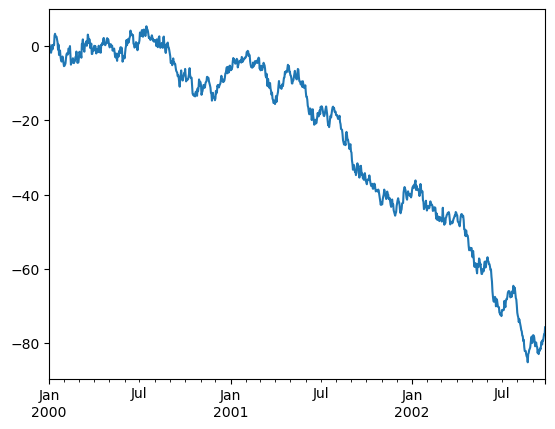

In [320]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

<Figure size 640x480 with 0 Axes>

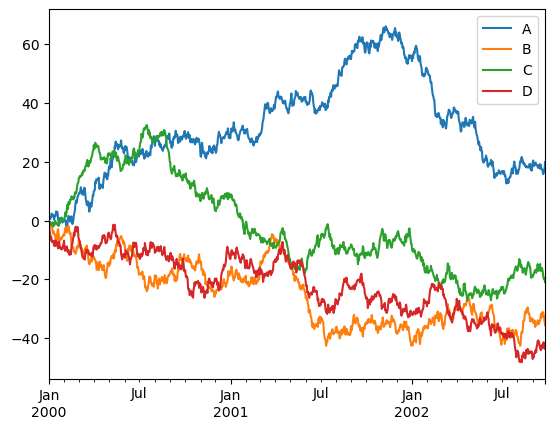

In [321]:
import matplotlib.pyplot as plt

df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum();
plt.figure();
df.plot();
plt.legend(loc="best");